## Data science - Predição de preço de casas 

Imagine que você trabalha em uma empresa do ramo de imóveis e seu chefe extrai um arquivo (.csv) com dados que descrevem as vendas de casas. O que seu chefe vê é um monte de numeros que ele não tem nem tempo, nem interesse de analisar. Por sua vez, você poderia passar semanas e até meses para estudar esses dados. 

Pra que você estudaria esses dados?
   - Esses dados mostram as vendas que foram realizadas.
   - Você precisa mostrar pro seu chefe o que está acontecendo ali de uma maneira rápida e que ele consiga entender.

Mas você pode ir mais longe. Especialistas utilizam seu conhecimento profissional sobre o histórico de vendas para supor um valor de imóvel. Mas o histórico de vendas traz justamente o preço de venda e a descrição das casas.
   - Será que é o suficiente para dar uma estimativa do valor?

Vamos descobrir.

### Importando bibliotecas básicas

In [3]:
import numpy as np                 # numérica
import pandas as pd                # manipulação de dados 
pd.set_option('max_columns', 105)  # visualização de colunas
import matplotlib.pyplot as plt    # gráficos

### Análise do dataset

O ciêntista de dados possui perguntas comuns no inicio da análise exploratória, são elas:
   - Quantas colunas e linhas tem meu dataset?
   - Quais são as variáveis (colunas)?
   - Quantos valores estão faltando no dataset?

Vamos tentar responder essas perguntas e conhecer melhor o conjunto de dados.

In [4]:
# Conhecendo o dataset
dados = pd.read_csv('house_data.csv')
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


Analisando o conjunto de dados e conhecendo o contexto de venda de imóveis é fácil interpretar a maioria das colunas. De todo modo, as descrições foram enviadas junto com o arquivo. Confira abaixo:
   - id : código da casa
   - date : data da venda
   - price : preço da venda
   - bedrooms : numero de quartos
   - bathrooms : numero de banheiros, onde .25 conta como banheiro sem chuveiro
   - sqft_living : quantidade de metros quadrados construídos
   - sqft_lot : quantidade de metros quadrados do lote
   - floors : numero de andares
   - waterfront : vista para o mar ou não
   - view : indice de 0 a 4 do quão boa é a vista
   - condition : indice de 1 a 5 referente ao estado da casa
   - grade : indice de 1 a 13 que avalia a qualidade da construção e design do edifício.
   - sqft_above : quantidade de metros quadrados da casa sem o porão
   - sqft_basement : quantidade de metros quadrados do porão
   - yr_built : ano de construção da casa
   - yr_renovated : ano de reforma
   - zipcode : código de área de onde está localizada a casa
   - lat : latitude
   - long : longitude
   - sqft_living15 : média de metros quadrados da sala dos 15 vizinhos mais próximos
   - sqft_lot15 : média de metros quadrados do lote dos 15 vizinhos mais próximos

In [45]:
# quantidade de colunas e linhas
dados.shape

(21613, 21)

In [46]:
# nome das colunas
dados.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
# Descrição estatistica dos dados. Aqui podemos ver a quantidade, média, desvio padrão, minimo, 25 a 75% e o máximo do valor.
dados.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


A partir da descrição já podemos ter algumas informações sobre as vendas. Por exemplo:
   - Foram realizadas 21613 vendas, que é o valor contido na linha 'count'.
   - A casa mais cara vendida tem o valor de 7.700.000 dolares e a com menor valor 75.000 dolares, max e min da coluna 'price'.
   - Possui dois banheiros em média nas casas, representado na coluna 'bathrooms' linha 'mean'.
   - A maioria das casas são de qualidade média alta, o que demonstra a linha 'mean' da coluna 'grade'. 
   - A vista da maioria das casas é ruim, uma vez que a média está abaixo de 1 ('mean'x'view')
   - A casa mais antiga vendida é de 1900, linha 'min' com coluna 'yr_built', se os dados são de 2015 a casa tem 115 anos
   
Outras informações podem ser extraídas. Mas vamos seguir com a análise.

## Pré processamento

Os dados não precisam de um pré processamento mais sofisticado. Na observação dos dados não foi observado variáveis que necessitavam de normalização, formatação ou categorização. Portanto, o único pré processamento que será realizado é a verificação de valores nulos.

In [15]:
# Quantos valores nulos existem no dataset?
dados.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

A única variável que possui valores nulos é o 'sqft_above'. Entretanto esse não é um caso que precisa ser tratado, uma vez que no contexto em que está aplicado esse valor significa que não há construção no terreno. 

## Análise dos dados

Seu chefe quer saber alguns detalhes das vendas:
   - Quantas casas foram vendidas?
   - Qual o preço médio das casas com 2 banheiros?
   - Qual o preço mínimo das casas de 3 quartos?
   - Qual o código postal mais caro?
   - Qual a influência da idade da casa no preço dela?
   
Agora que já sabemos as informações que queremos extrair, vamos retirar as colunas que não nos interessam.

In [10]:
dados_split = dados[['id', 'price', 'bedrooms', 'bathrooms', 'yr_built', 'zipcode']]
dados_split.head()

,id,price,bedrooms,bathrooms,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1955,98178
1,6414100192,538000.0,3,2.25,1951,98125
2,5631500400,180000.0,2,1.00,1933,98028
3,2487200875,604000.0,4,3.00,1965,98136
4,1954400510,510000.0,3,2.00,1987,98074


### Quantas casas foram vendidas?

Chegamos na quantidade de casas vendidas contando os códigos de identificação e para isso utilizamos a função count.

In [16]:
dados_split.id.count()

21613

### Qual o preço médio das casas com 2 banheiros?

Para saber o preço médio das casas com banheiro, primeiro separamos o conjunto de dados somente com casas que possuem dois banheiros.

In [47]:
df_2banheiros = dados_split.loc[dados_split['bathrooms']==2.00]

Agora pegamos a variável de interesse, que nesse caso é 'price', e fazemos a média dos valores utilizando a função mean.

In [48]:
df_2banheiros['price'].mean()

457889.7186528497

### Qual o preço mínimo das casas de 3 quartos?

Da mesma forma que feito para as casas com dois banheiros, vamos separar um conjunto de dados somente para casas que possuem 3 quartos.

In [49]:
df_3quartos = dados_split.loc[dados_split['bedrooms']==3]

Novamente pegamos a variável de interesse, price, só que dessa vez a função utilizada é min, uma vez que queremos o valor minimo.

In [50]:
df_3quartos['price'].min()

82000.0

### Qual o código postal mais caro?

Para saber o código postal mais 

In [ ]:
df_zipcode = dados_split.groupby(['zipcode']).mean()

In [34]:
df_zipcode['price'].sort_values(ascending=False)

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
             ...     
98148    2.849086e+05
98001    2.808047e+05
98032    2.512962e+05
98168    2.403284e+05
98002    2.342840e+05
Name: price, Length: 70, dtype: float64

Os três códigos postais que possuem preço médio das casas mais elevado estão presentes na imagem abaixo. Vamos que faz sentido o preço do imóvel ser mais caro, uma vez que são regiões litorais e de alto padrão.

[image.png](attachment:image.png)
<img src=attachment:image.png alt="drawing" width="500"/>
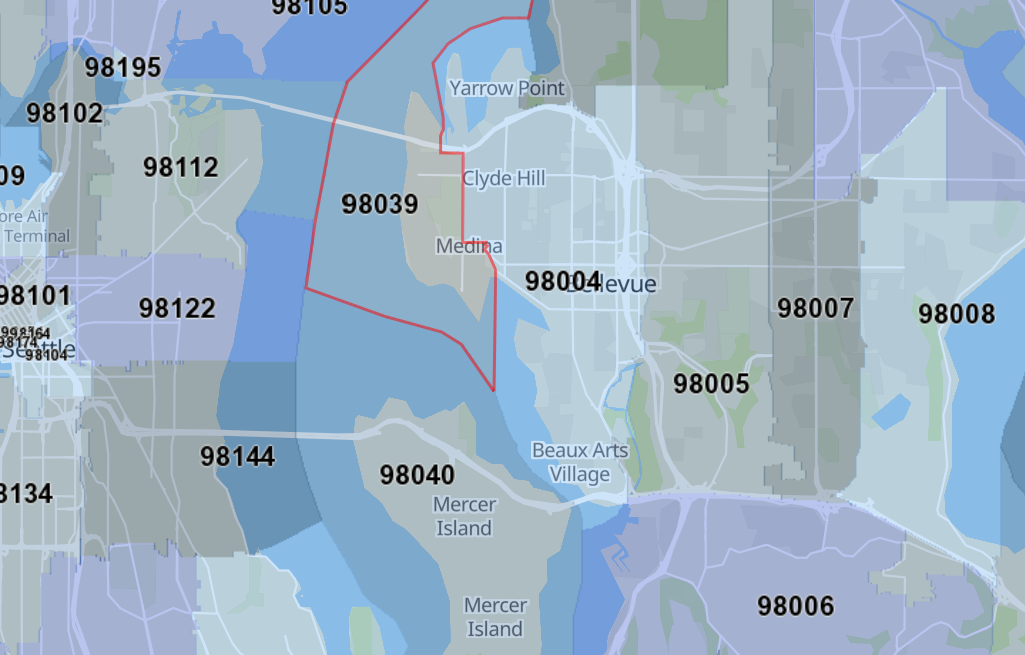

### Qual a influência da idade da casa no preço dela?

Para verificar a influência do ano em que a casa foi construida no preço dela, vamos verificar se as variáveis tem correlação. A correlação é a dependência ou similaridade entre duas coisas. Por exemplo, se a correlação do preço e da vista para o mar for alta, podemos deduzir que ter vista para o mar é um fator decisivo no preço, ou seja, tem alta influência no preço do imóvel. 

In [36]:
dados_split[['price', 'yr_built']].corr()

,price,yr_built
price,1.000000,0.054012
yr_built,0.054012,1.000000


# Predição do preço dos imóveis

A imagem abaixo mostra os 5 passos mais importantes para criação de um modelo Machine Learning. É claro que essa é uma visão macro do que realmente acontece, mas é o suficiente para que possamos nos apoiar nela. Já temos o conjunto de dados e fizemos a maior parte do segundo passo com a análise e pré processamento simples dos dados. Para completar o segundo passo, vamos manipular as colunas que serão utilizadas.

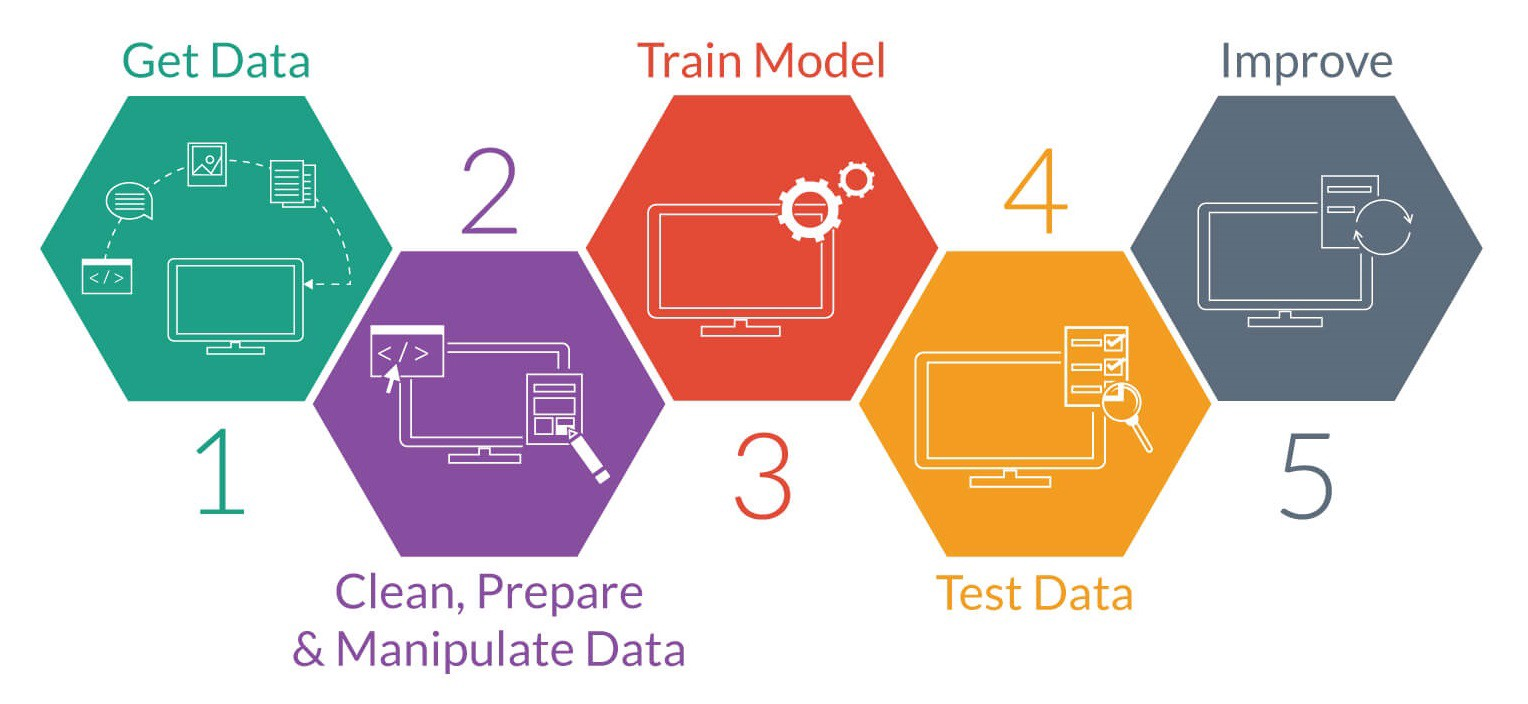

Nessa primeira versão, vamos utilizar todos os parâmetros disponíveis, sem verificar a correlação deles com o preço do imóvel.

In [ ]:
# Manipulando as colunas


In [37]:
# Bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
# Separando variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(dados.iloc[:,3:], dados.iloc[:,2], test_size=0.2, random_state=50)

In [ ]:
# Modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
score_lr = lr.score(X_train,y_train)
score_lr